### Sobre o desafio
De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:
- [X] Tratar os dados
- [X] Formatar (se necessário)
- [X] Treinar o modelo
- [X] Prever a venda de dezembro
- [X] Montar um histograma dos dados
- [X] Montar um plot de scatter

Caso tenha alguma dúvida, revise o módulo com calma e reveja suas anotações! Você irá conseguir!


In [3]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}


#### Resolução

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [6]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas.head()

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600


In [8]:
# Incluir numero do mês
df_vendas['mes_num'] = range(1, 13)

In [12]:
# Dividir dados em conjuntos de treino e teste
X = df_vendas[['mes_num']]
y = df_vendas['vendas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Previsão
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
y_pred

array([3222.48603352, 3113.12849162, 2128.91061453])

In [16]:
mae

54.84171322160122

In [17]:
r2

0.9804933170681456

In [24]:
vendas_pred = model.predict(df_vendas[['mes_num']])
dezembro_pred = vendas_pred[11]
print(f"Previsão de vendas para dezembro: {round(dezembro_pred, 2)}")

Previsão de vendas para dezembro: 3331.84


array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'mes_num'}>]], dtype=object)

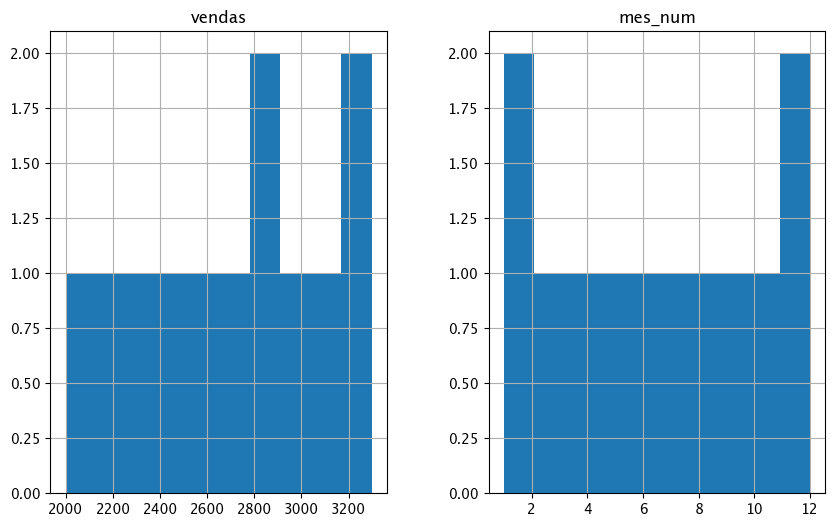

In [37]:
# Histograma
df_vendas.hist(figsize=(10, 6), grid=True)

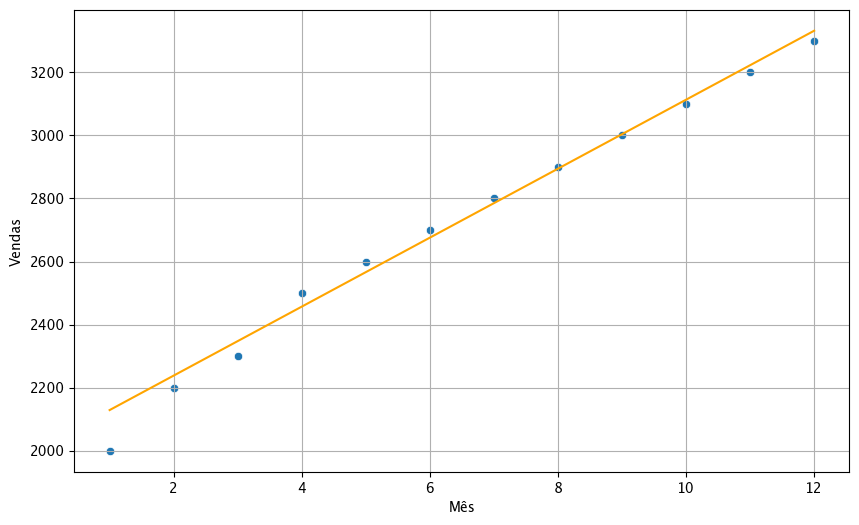

In [36]:
# Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vendas, x='mes_num', y='vendas')
plt.plot(df_vendas['mes_num'], vendas_pred, color='orange')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)